# AthleteAlias  <img src="https://e7.pngegg.com/pngimages/205/571/png-clipart-soccer-player-hand-painted-football-thumbnail.png" alt="alternative_text">

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv("players_fifa23.csv")
data

,ID,Name,FullName,Age,Height,Weight,PhotoUrl,Nationality,Overall,Potential,...,LMRating,CMRating,RMRating,LWBRating,CDMRating,RWBRating,LBRating,CBRating,RBRating,GKRating
0,158023,L. Messi,Lionel Messi,35,169,67,https://cdn.sofifa.net/players/158/023/23_60.png,Argentina,91,91,...,91,88,91,67,66,67,62,53,62,22
1,165153,K. Benzema,Karim Benzema,34,185,81,https://cdn.sofifa.net/players/165/153/23_60.png,France,91,91,...,89,84,89,67,67,67,63,58,63,21
2,188545,R. Lewandowski,Robert Lewandowski,33,185,81,https://cdn.sofifa.net/players/188/545/23_60.png,Poland,91,91,...,86,83,86,67,69,67,64,63,64,22
3,192985,K. De Bruyne,Kevin De Bruyne,31,181,70,https://cdn.sofifa.net/players/192/985/23_60.png,Belgium,91,91,...,91,91,91,82,82,82,78,72,78,24
4,231747,K. Mbappé,Kylian Mbappé,23,182,73,https://cdn.sofifa.net/players/231/747/23_60.png,France,91,95,...,92,84,92,70,66,70,66,57,66,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18534,243725,D. Collins,Darren Collins,21,174,68,https://cdn.sofifa.net/players/243/725/23_60.png,Republic of Ireland,47,56,...,50,44,50,41,38,41,40,36,40,15
18535,261933,Yang Dejiang,Dejiang Yang,17,175,60,https://cdn.sofifa.net/players/261/933/23_60.png,China PR,47,57,...,45,45,45,47,48,47,49,49,49,15
18536,267823,L. Mullan,Liam Mullan,18,170,65,https://cdn.sofifa.net/players/267/823/23_60.png,Northern Ireland,47,67,...,52,49,52,46,44,46,46,42,46,17
18537,267824,D. McCallion,Daithí McCallion,17,178,65,https://cdn.sofifa.net/players/267/824/23_60.png,Republic of Ireland,47,61,...,33,33,33,44,42,44,47,49,47,15


In [4]:
data.shape

(18539, 90)

In [5]:
data.value_counts

<bound method DataFrame.value_counts of            ID            Name            FullName  Age  Height  Weight  \
0      158023        L. Messi        Lionel Messi   35     169      67   
1      165153      K. Benzema       Karim Benzema   34     185      81   
2      188545  R. Lewandowski  Robert Lewandowski   33     185      81   
3      192985    K. De Bruyne     Kevin De Bruyne   31     181      70   
4      231747       K. Mbappé       Kylian Mbappé   23     182      73   
...       ...             ...                 ...  ...     ...     ...   
18534  243725      D. Collins      Darren Collins   21     174      68   
18535  261933    Yang Dejiang        Dejiang Yang   17     175      60   
18536  267823       L. Mullan         Liam Mullan   18     170      65   
18537  267824    D. McCallion    Daithí McCallion   17     178      65   
18538  261424        N. Rabha         Nabin Rabha   25     176      66   

                                               PhotoUrl          Nation

In [6]:
data.isna().sum()

ID           0
Name         0
FullName     0
Age          0
Height       0
            ..
RWBRating    0
LBRating     0
CBRating     0
RBRating     0
GKRating     0
Length: 90, dtype: int64

In [7]:
needed_columns = ['ID', 'Name', 'Age', 'Height', 'Weight',
       'Overall', 'Potential', 'Growth', 'TotalStats',
       'BaseStats', 'BestPosition', 'Club', 'ValueEUR', 'WageEUR',
       'ReleaseClause', 'ContractUntil', 'ClubJoined', 'OnLoad',
       'PreferredFoot', 'IntReputation', 'WeakFoot','Nationality',
       'SkillMoves', 'AttackingWorkRate', 'DefensiveWorkRate', 'PaceTotal',
       'ShootingTotal', 'PassingTotal', 'DribblingTotal', 'DefendingTotal',
       'PhysicalityTotal', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
       'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']


data = data[needed_columns]

# EDA 


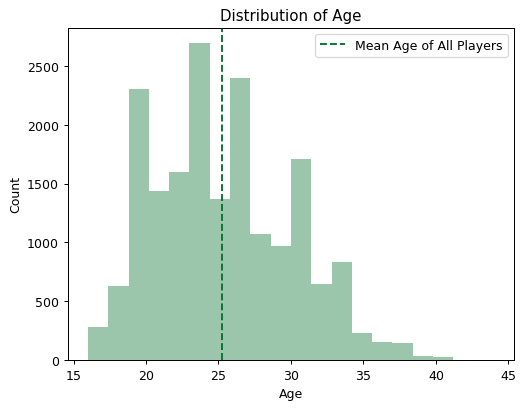

In [8]:
sns.set_palette("Greens_r")
plt.figure(dpi=90)
sns.distplot(x=data['Age'], kde=False, bins=20)
plt.axvline(x=np.mean(data['Age']), ls='--', label='Mean Age of All Players')
plt.legend()
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age')
plt.show()

<h3>Height affects different factors like stamina, dribbling, pace, passing and HeadingAccuracy:</h3> 

<Axes: xlabel='Height', ylabel='Value'>

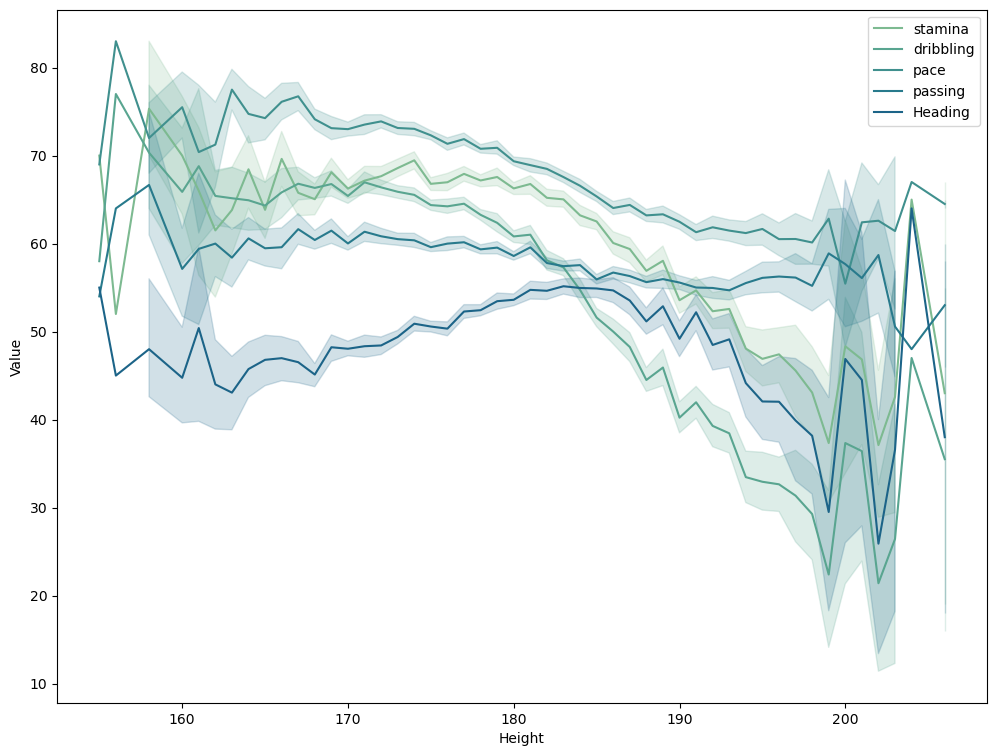

In [9]:
sns.set_palette("crest")
fig = plt.gcf()
fig.set_size_inches(12, 9)
plt.ylabel("Value")

sns.lineplot(x='Height', y='Stamina', data=data, legend='brief', label='stamina')
sns.lineplot(x='Height', y='Dribbling', data=data, legend='brief', label='dribbling')
sns.lineplot(x='Height', y='PaceTotal', data=data, legend='brief', label='pace')
sns.lineplot(x='Height', y='PassingTotal', data=data, legend='brief', label='passing')
sns.lineplot(x='Height', y='HeadingAccuracy', data=data, legend='brief', label='Heading')

<h3>Top Quikest Players:</h3>

In [10]:
top_acc = data.sort_values(by=["Acceleration"], ascending=False)

<Axes: xlabel='Name', ylabel='Acceleration'>

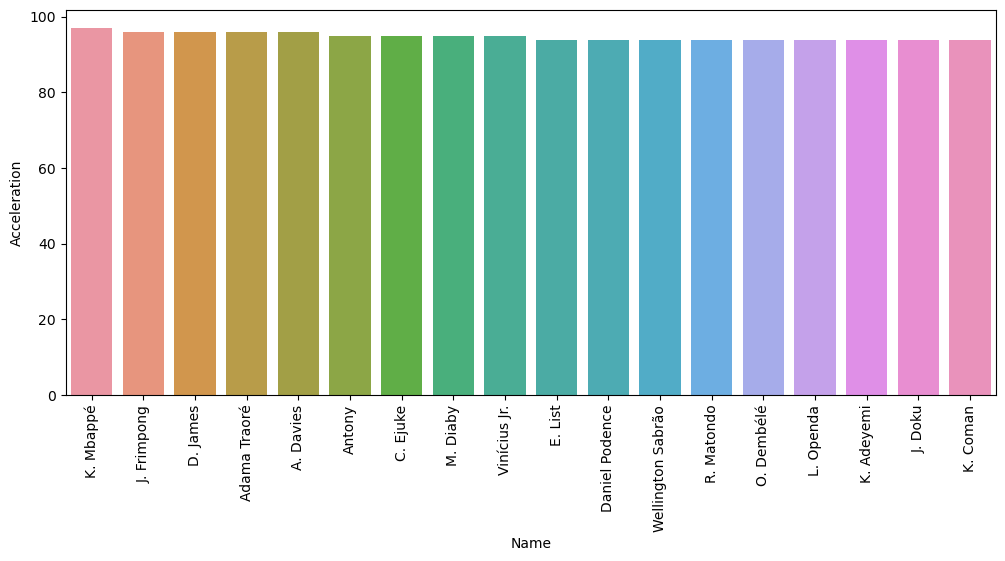

In [11]:
plt.figure(figsize=(12, 5))
plt.xticks(rotation=90)
sns.barplot(x="Name", y = "Acceleration", data=top_acc.head(20))

<h3>Relation between the Position of the Player and his Wage and Value</h3>

<Axes: xlabel='BestPosition', ylabel='WageEUR'>

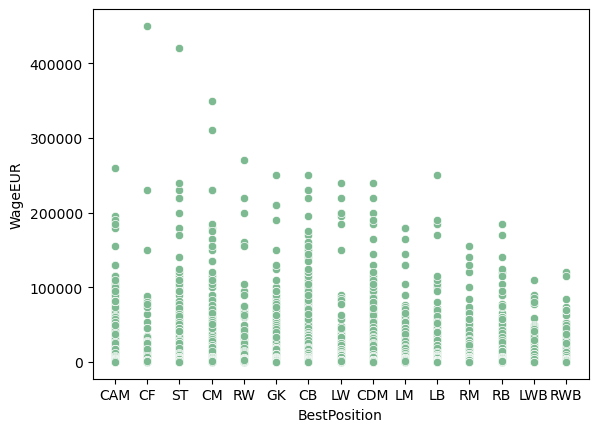

In [12]:
sns.scatterplot(x="BestPosition", y="WageEUR", data=data)

<Axes: xlabel='BestPosition', ylabel='ValueEUR'>

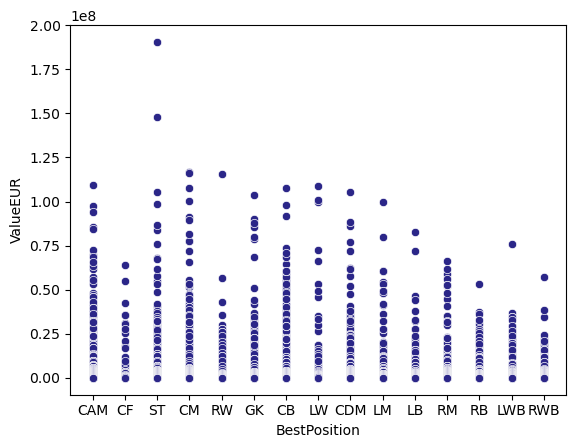

In [13]:
sns.set_palette("CMRmap")
sns.scatterplot(x="BestPosition", y="ValueEUR", data=data)

<h3>Effect of the Age on the Potential of the Players:</h3>

<Axes: xlabel='Age', ylabel='Potential'>

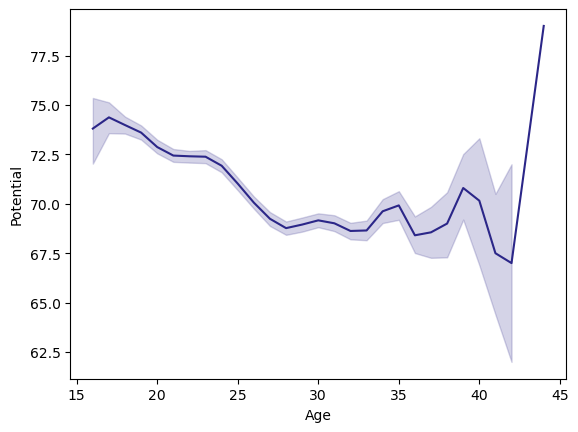

In [14]:
sns.lineplot(x="Age", y="Potential", data=data)

<h3>View the Top 50 Players and their Clubs:</h3>

In [15]:
top_rated = data.sort_values(by=["Overall"], ascending=False)
top50 = top_rated.head(50)

<h3>Top 50 Players</h3>

<Axes: xlabel='Name', ylabel='Overall'>

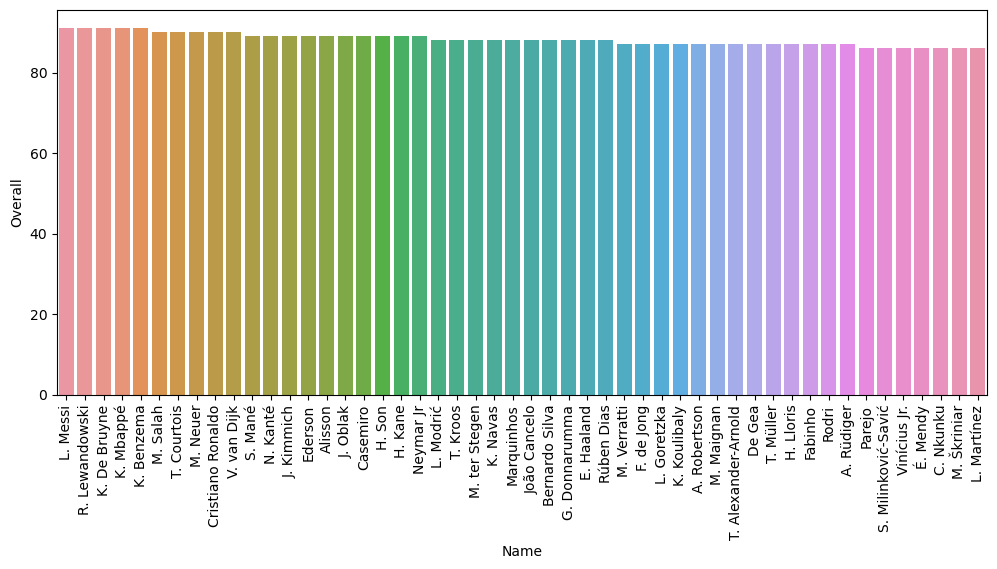

In [16]:
plt.figure(figsize=(12, 5))
plt.xticks(rotation=90)
sns.barplot(x="Name", y = "Overall", data=top50)

<Axes: xlabel='Club', ylabel='count'>

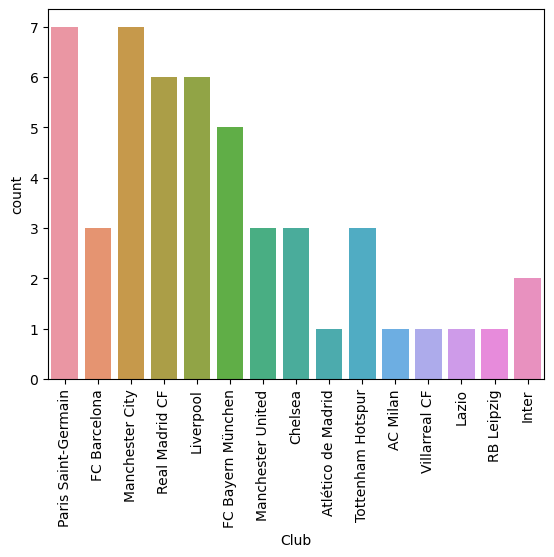

In [17]:
plt.figure(dpi=100)
plt.xticks(rotation=90)
sns.countplot(x="Club", data=top50)